Effective Use of Word Order for Text Categorization with Convolutional Neural Networks
 
https://arxiv.org/abs/1412.1058



In [1]:
pip install birdseye 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 716 kB 19.5 MB/s 
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=dae022833d341e96895962d1e8d7ce255e447a2880a44b0564a0803167e4fb11
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
  Created wheel for flask-humanize: filename=Flask_Humanize-0.3.0-py3-none-any.whl size=3642 sha256=621a490d97746f3fb0d63ec18ac2459688aa42e6f39303244b75a1d41b7e1c0b
  Stored in directory: /root/.cache/pip/wheels/02/92/82/b38683844f7d77443b1e9d89e61898c5de0683412b597d90f5
Successfully built littleutils flask-humanize


In [2]:
!pip install tensorflow==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 50 kB/s 
     |████████████████████████████████| 488 kB 38.9 MB/s 
     |████████████████████████████████| 3.1 MB 14.3 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

In [3]:
%load_ext birdseye
%config BirdsEyeMagics.port = 7778

In [4]:
import tarfile,os,sys, re
is_eager_exec_init=False
import psutil

In [5]:
import numpy as np
import tensorflow as tf
import pickle
import sklearn

# Use spacy to remove stop words first
import spacy

nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [6]:
pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31285 sha256=8da2a4653b8ecb603b1e147f5073438eaba184d6de02a70fab8a031a8fdb1189
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [7]:
%load_ext memory_profiler
%memit

peak memory: 838.14 MiB, increment: 0.00 MiB


Setup different variables in order to be able to reuse 
- data loading
- data preparation steps later on when setting up the model. (defined later on) 

In [8]:
is_data_already_loaded = False


imdb dataset should be stored in /datasets dir.

In [ ]:
'''
if not is_data_already_loaded:
    test_neg_files = []
    test_pos_files = []
    train_neg_files = []
    train_pos_files = []

    with tarfile.open('/content/aclImdb_v1.tar.gz') as tar:
        for mbr in tar.getmembers():
            matches = re.findall('/test/neg/.*\.txt',mbr.name)
            if len(matches)==1:
                f=tar.extractfile(mbr)
                content=f.read()        
                test_neg_files.append((mbr,content))
            matches = re.findall('/test/pos/.*\.txt',mbr.name)
            if len(matches)==1:
                f=tar.extractfile(mbr)
                content=f.read()  
                test_pos_files.append((mbr, content))
            matches = re.findall('/train/neg/.*\.txt',mbr.name)
            if len(matches)==1:
                f=tar.extractfile(mbr)
                content=f.read()        
                train_neg_files.append((mbr,content))
            matches = re.findall('/train/pos/.*\.txt',mbr.name)
            if len(matches)==1:
                f=tar.extractfile(mbr)
                content=f.read()  
                train_pos_files.append((mbr, content))
'''

In [8]:
'''
if not is_data_already_loaded:
    train_neg = [txt.decode("utf-8")  for file,txt in train_neg_files]
    train_pos = [txt.decode("utf-8")  for file,txt in train_pos_files]

    test_neg = [txt.decode("utf-8")  for file,txt in test_neg_files]
    test_pos = [txt.decode("utf-8")  for file,txt in test_pos_files]
    '''

'\nif not is_data_already_loaded:\n    train_neg = [txt.decode("utf-8")  for file,txt in train_neg_files]\n    train_pos = [txt.decode("utf-8")  for file,txt in train_pos_files]\n\n    test_neg = [txt.decode("utf-8")  for file,txt in test_neg_files]\n    test_pos = [txt.decode("utf-8")  for file,txt in test_pos_files]\n    '

In [30]:
import pandas as pd
datasource=pd.read_csv('/content/spam_train.csv')
source_data=[]
Label_data=[]
for index, row in datasource.iterrows():
  source_data.append(row['data'])
  Label_data.append(row['b_labels'])

In [31]:
datasourc_test=pd.read_csv('/content/spam_test.csv')
test_data=[]
Label_test=[]
for index, row in datasourc_test.iterrows():
  test_data.append(row['data'])
  Label_test.append(row['b_labels'])

In [34]:
print(Label_test)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 

In [35]:
vocab_nb = 20000

def clean_docs(docs):
    # clean docs by:
    # - removing stop words
    docs_wtho_stop = []
    for raw_doc in docs:
        doc = nlp(raw_doc)
        doc_wtho_stop = ""
        for tok in doc:
            if not tok.is_stop:
                doc_wtho_stop = doc_wtho_stop +tok.text+ " "
        docs_wtho_stop.append(doc_wtho_stop)
    return docs_wtho_stop

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
#from tensorflow.keras.backend import one_hot, get_session, set_session
from tensorflow.compat.v1.keras.backend import set_session, one_hot, get_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D,MaxPool1D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, SGD


In [37]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran) 
# (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

In [38]:
def docs_to_sequences(docs, vocab_nb=20000, max_length=None):
    # create the tokenizer
    t = Tokenizer(num_words=vocab_nb)
    # fit the tokenizer on the documents
    t.fit_on_texts(docs)
    # create each doc as a list of integer indices
    docs_seq_int = t.texts_to_sequences(docs)
   # print(docs_seq_int)
    
    
    doc_nb = len(docs_seq_int)
    if max_length==None:
        max_length = len(sorted(docs_seq_int,key=len, reverse=True)[0])
        #print("max_lenght computed:",max_length)
    #print("max_length:",max_length)
    
    # Create a dense array of shape (doc_nb,max_length). 
    # Each cell contains a int (the indice of word)
    
    docs_seq_dense = []
    docs_seq_array = np.zeros((doc_nb,max_length),dtype=np.int16)
    for idx, seq_int in enumerate(docs_seq_int):
        padded_seq_int = seq_int+[0]*(max_length-len(seq_int))
        doc_array = np.array(padded_seq_int, dtype=np.int16)
        docs_seq_array[idx]=doc_array[:max_length]

    return docs_seq_array
    

In [39]:
def categorical_generator(X, y, batch_size=64,vocab_nb=20000):
    # Must be able to iterate many times on the same X/y , for instance while training with many epochs.
    i=0
    while True:
        #print(i)
       # print(i)
        if i >= len(X):
            i=0
        tmp_X = X[i:batch_size+i]
        #print(tmp_X)
        batch_X= to_categorical(tmp_X,num_classes=vocab_nb)
        #print(batch_X)
        batch_y = y[i:batch_size+i]
        #print("cat gen: ", len(batch_X), len(batch_y))
        yield batch_X, batch_y
        i+=batch_size       

## Toy Test data preparation

Data preparation logic is tested on a very small toy data set.


In [40]:
do_toy_test=True

if do_toy_test:
    toy_vocab_nb = 20
    toy_max_sent_len = 8
  
    docs = ['Well done!',
            'Good work, good effort',
            'Great effort guys',
            'nice work my friend',
            'Excellent job my friend!',
            'What a poor job !! ',
            'This is a shame',
            'You are a poor guy',
            'Fantastic effort my friend and brother, hell of a great job for ever I like it',
            'I like you so much my friend',
            'You worked so bad poor guy']

    cleaned_docs = clean_docs(docs)
    #print(cleaned_docs)
    doc_sequences = docs_to_sequences(cleaned_docs, max_length=toy_max_sent_len, vocab_nb=toy_vocab_nb)
    print(doc_sequences)
    #print(type(doc_sequences))
    np.save("./tst",doc_sequences)
    tmp_array = np.load("./tst.npy")
    #print(tmp_array)
    
    labels=[1,1,0,1,1,0,0,0,1,0,1]
#%memit

[[ 0  0  0  0  0  0  0  0]
 [ 5  6  5  2  0  0  0  0]
 [ 7  2 10  0  0  0  0  0]
 [11  6  1  0  0  0  0  0]
 [12  3  1  0  0  0  0  0]
 [ 4  3  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0]
 [ 4  8  0  0  0  0  0  0]
 [14  2  1 15 16  7  3  9]
 [ 9  1  0  0  0  0  0  0]
 [17 18  4  8  0  0  0  0]]


In [41]:
print(doc_sequences)

[[ 0  0  0  0  0  0  0  0]
 [ 5  6  5  2  0  0  0  0]
 [ 7  2 10  0  0  0  0  0]
 [11  6  1  0  0  0  0  0]
 [12  3  1  0  0  0  0  0]
 [ 4  3  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0]
 [ 4  8  0  0  0  0  0  0]
 [14  2  1 15 16  7  3  9]
 [ 9  1  0  0  0  0  0  0]
 [17 18  4  8  0  0  0  0]]


In [42]:
if do_toy_test:
    #print(doc_sequences,labels)
    toy_batch_size=2
    nb_iter=doc_sequences.shape[0] // toy_batch_size
    j=0
    nb_epoch=0
    for batch_x, batch_y in categorical_generator(doc_sequences,labels,batch_size=toy_batch_size,vocab_nb=toy_vocab_nb):
       # print(type(batch_x),batch_x.shape)
        #print(batch_y)
        #print(batch_x)
        assert (len(batch_x)<=toy_batch_size) & (len(batch_y) <=toy_batch_size)
        #print(nb_epoch,j,nb_iter)
        if j > nb_iter:
            j=0
            nb_epoch+=1
 #       if batch_x.shape[0]<test_batch_size:
 #           nb_epoch+=1
        if nb_epoch ==3:
            break        
        j+=1


In [43]:
print(doc_sequences[:
                    -2],labels[:-2])

[[ 0  0  0  0  0  0  0  0]
 [ 5  6  5  2  0  0  0  0]
 [ 7  2 10  0  0  0  0  0]
 [11  6  1  0  0  0  0  0]
 [12  3  1  0  0  0  0  0]
 [ 4  3  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0]
 [ 4  8  0  0  0  0  0  0]
 [14  2  1 15 16  7  3  9]] [1, 1, 0, 1, 1, 0, 0, 0, 1]


In [44]:
if do_toy_test:
    toy_batch_size=3
    toy_model = Sequential([
        Conv1D(1, 2, strides=1, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros',input_shape=(toy_max_sent_len,toy_vocab_nb), kernel_regularizer=l2(0.01)),
        MaxPool1D(pool_size=2),
        Flatten(),
        Dense(1, kernel_initializer='he_normal', bias_initializer='zeros', activation='sigmoid')
    ])
    toy_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    tb_cb = TensorBoard(log_dir='./logs-test', histogram_freq=0, batch_size=4, 
                write_graph=True, write_grads=True, )
    
    test_steps_per_epoch=len(doc_sequences)/toy_batch_size
    print("nb steps per epoch", test_steps_per_epoch)
    
    train_cat_gen = categorical_generator(doc_sequences[:-2],labels[:-2],batch_size=toy_batch_size,vocab_nb=toy_vocab_nb)
    xval_cat_gen = categorical_generator(doc_sequences[-2:],labels[-2:],batch_size=toy_batch_size,vocab_nb=toy_vocab_nb)
    toy_history = toy_model.fit_generator(train_cat_gen, steps_per_epoch=test_steps_per_epoch,epochs=10, validation_data=xval_cat_gen,validation_steps=1 ,verbose=2, callbacks=[tb_cb])
    
    toy_model.summary()
    toy_model.save('./toy_model_v1')
    

nb steps per epoch 3.6666666666666665
Epoch 1/10
4/3 - 1s - loss: 0.6768 - acc: 0.6667 - val_loss: 0.6552 - val_acc: 1.0000
Epoch 2/10
4/3 - 0s - loss: 0.6817 - acc: 0.6667 - val_loss: 0.6546 - val_acc: 1.0000
Epoch 3/10
4/3 - 0s - loss: 0.6697 - acc: 0.6667 - val_loss: 0.6548 - val_acc: 1.0000
Epoch 4/10
4/3 - 0s - loss: 0.6696 - acc: 0.6667 - val_loss: 0.6546 - val_acc: 0.5000
Epoch 5/10
4/3 - 0s - loss: 0.6756 - acc: 0.6667 - val_loss: 0.6541 - val_acc: 0.5000
Epoch 6/10
4/3 - 0s - loss: 0.6654 - acc: 0.6667 - val_loss: 0.6543 - val_acc: 0.5000
Epoch 7/10
4/3 - 0s - loss: 0.6646 - acc: 0.6667 - val_loss: 0.6542 - val_acc: 0.5000
Epoch 8/10
4/3 - 0s - loss: 0.6704 - acc: 0.6667 - val_loss: 0.6538 - val_acc: 0.5000
Epoch 9/10
4/3 - 0s - loss: 0.6614 - acc: 0.6667 - val_loss: 0.6541 - val_acc: 0.5000
Epoch 10/10
4/3 - 0s - loss: 0.6600 - acc: 0.6667 - val_loss: 0.6540 - val_acc: 0.5000
Model: "sequential_2"
_________________________________________________________________
Layer (type) 

## Prepare real data

As this process is time consuming, prepared data are stored as numpy arrays. 
Var is_data_already_prepared is used to control if we need to prepare the data again. 

In [45]:
# As data as already been prepared, i will be omitted
is_data_already_prepared=False
max_sent_len = 30
if not is_data_already_prepared:
    
    cleaned_train_neg = clean_docs(source_data)
    seq_train_neg = docs_to_sequences(cleaned_train_neg, max_length=max_sent_len)  
    '''  
    cleaned_train_pos = clean_docs(train_pos)
    seq_train_pos = docs_to_sequences(cleaned_train_pos, max_length=max_sent_len)
    np.save('./seq_train_neg',seq_train_neg)
    '''
    np.save('./source_data',source_data)
    
    cleaned_test_neg = clean_docs(test_data)
    seq_test_neg = docs_to_sequences(cleaned_test_neg,max_length=max_sent_len)

    '''
    cleaned_test_pos = clean_docs(test_pos)
    seq_test_pos = docs_to_sequences(cleaned_test_pos, max_length=max_sent_len)
    np.save('./seq_test_neg',seq_test_neg)
    np.save('./seq_test_pos',seq_test_pos)
    '''


In [46]:
max_sent_len = 30

In [ ]:
'''
is_data_already_prepared=True
if is_data_already_prepared:
    seq_test_neg = np.load('./seq_test_neg.npy')
    seq_test_pos = np.load('./seq_test_pos.npy')
    seq_train_neg = np.load('./seq_train_neg.npy')
    seq_train_pos = np.load('./seq_train_pos.npy')
    print("prepared data loaded")
    '''

In [ ]:
# Print shapes of different prepared datasets
'''
seq_train_neg[:].shape, seq_train_pos[:].shape,seq_test_neg.shape, seq_test_pos.shape
'''

In [50]:
#seq_train_neg.shape, type(seq_test_neg)
train_pos = np.ones((seq_train_neg.shape[0]))
train_neg = np.zeros((seq_train_neg.shape[0]))

#test_pos = np.ones((seq_test_neg.shape[0]))
#test_neg = np.zeros((seq_test_neg.shape[0]))

In [51]:
type(train_pos)

numpy.ndarray

In [ ]:
#seq_train = seq_train_neg + seq_train_pos
'''
seq_train = np.append(seq_train_neg,seq_train_pos,axis=0)
seq_test = np.append(seq_test_neg,seq_test_pos,axis=0)
train_label = np.append(train_neg,train_pos,axis=0)
test_label = np.append(test_neg,test_pos,axis=0)
assert np.any(train_label[:12500]==0)
assert np.any(train_label[1250:]==1.)
assert np.any(test_label[:12500]==0)
assert np.any(test_label[12500:]==1.)
seq_train_neg.shape, seq_train.shape,seq_test.shape,train_label.shape, test_label.shape
'''

### Prepare validation data set

In [47]:
import sklearn.model_selection
import numpy as np

In [48]:
type(Label_data)
labels = np.array(Label_data)
type(labels)

numpy.ndarray

In [49]:
xval_rate=0.2
X_train, X_xval, y_train, y_xval = sklearn.model_selection.train_test_split(seq_train_neg,labels, test_size=0.2)
#assert X_train.shape==(seq_train.shape[0] * (1-xval_rate),seq_train.shape[1])
print("train & xval shapes:", X_train.shape,X_xval.shape, y_train.shape, y_xval.shape)

#print(X_xval.shape)


train & xval shapes: (4136, 30) (1035, 30) (4136,) (1035,)


In [50]:
vocab_nb=20000

## Create model and train it

### shallow CNN model

in order to setup the model with agility, train_nb and xval_nb can be specified with small numbers

In [51]:
do_train=True
if do_train:

    batch_size=78
    epochs_nb = 1
    model = Sequential([
        Conv1D(1, 2, strides=1, activation='relu', kernel_initializer='he_normal', 
               bias_initializer='zeros',input_shape=(max_sent_len,vocab_nb),
                kernel_regularizer=l2(0.01)),
        MaxPool1D(pool_size=2),
        Flatten(),
        Dense(1, kernel_initializer='he_normal', bias_initializer='zeros',activation='sigmoid')
    ])
    rmsprop = RMSprop(lr=1e-3)
    # results on sgd are by far worst than rmsprop
    sgd = SGD(lr=1e-3, momentum=0.9)
    
    model.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])
    model.summary()
    
    cb_list = [
        ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=10),
        TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, 
                write_graph=True, write_grads=True, )
    ]
    
    # used to train only on a subset while configuring the network architecture
    train_nb = 128
    # comment next line if you want to work on a smaller dataset
    train_nb = None
    if not train_nb:
        train_nb = len(X_train)
    xval_nb = 20
    # comment next line if you want to work on a smaller dataset
    xval_nb = None
    if not xval_nb:
        xval_nb = len(X_xval)

    steps_per_epoch=train_nb// batch_size
    print("nb steps per epoch", steps_per_epoch)
    train_cat_gen = categorical_generator(X_train[:train_nb],y_train[:train_nb],batch_size=batch_size,vocab_nb=vocab_nb)
    xval_cat_gen = categorical_generator(X_xval[:xval_nb],y_xval[:xval_nb],batch_size=batch_size,vocab_nb=vocab_nb)
    history = model.fit_generator(train_cat_gen, steps_per_epoch=steps_per_epoch,epochs=epochs_nb, 
                                  validation_data=xval_cat_gen,
                                  validation_steps=1 ,verbose=1, callbacks=cb_list)
    
    
    model.save('./model_v1.hdf5')
    model.save_weights('./model_w_v1')


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 29, 1)             40001     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 14, 1)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 14)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 40,016
Trainable params: 40,016
Non-trainable params: 0
_________________________________________________________________
nb steps per epoch 53
53/53 [==============================] - 20s 377ms/step - loss: 0.6601 - acc: 0.8677 - val_loss: 0.6306 - val_acc: 0.8718


In [93]:
def createmodel():
  model = Sequential([
        Conv1D(1, 2, strides=1, activation='relu', kernel_initializer='he_normal', 
               bias_initializer='zeros',input_shape=(max_sent_len,vocab_nb),
                kernel_regularizer=l2(0.01)),
        MaxPool1D(pool_size=2),
        Flatten(),
        Dense(1, kernel_initializer='he_normal', bias_initializer='zeros',activation='sigmoid')
       ])
  rmsprop = RMSprop(lr=1e-3)
    # results on sgd are by far worst than rmsprop
  sgd = SGD(lr=1e-3, momentum=0.9)
    
  model.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])
  model.summary()
    
  cb_list = [
        ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=10),
        TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, 
                write_graph=True, write_grads=True, )
    ]

### Plot results

In [52]:
%matplotlib inline

In [53]:
import h5py

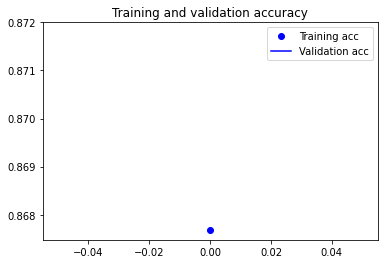

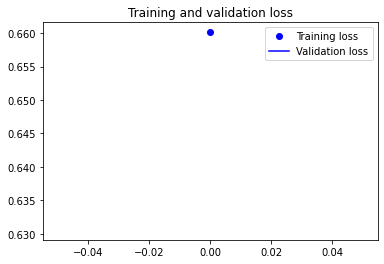

In [54]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Evaluate on test data

In [109]:
#from tensorflow.keras.models import load_model

In [ ]:
#loaded_model = load_model('./model_v1.hdf5')

In [ ]:
#pip install h5py

In [56]:
step = 20
max_test_nb = seq_test_neg.shape[0]
for i in range(0,max_test_nb,step):    
    test_from = i
    test_size=20
    test_to = test_from + test_size+1
    test_X= to_categorical(seq_test_neg[test_from:test_to],num_classes=vocab_nb)
    test_y = Label_test[test_from:test_to]
    
    test_loss, test_acc = model.evaluate(test_X, test_y)
    print('test_loss:', test_loss, ' test accuracy:', test_acc)

21/21 [==============================] - 0s 2ms/sample - loss: 0.6447 - acc: 0.8571
test_loss: 0.6446771025657654  test accuracy: 0.85714287
21/21 [==============================] - 0s 2ms/sample - loss: 0.6492 - acc: 0.8095
test_loss: 0.6491934061050415  test accuracy: 0.8095238
21/21 [==============================] - 0s 2ms/sample - loss: 0.6292 - acc: 0.9048
test_loss: 0.6291744709014893  test accuracy: 0.9047619
21/21 [==============================] - 0s 2ms/sample - loss: 0.6381 - acc: 0.8571
test_loss: 0.6380521059036255  test accuracy: 0.85714287
21/21 [==============================] - 0s 2ms/sample - loss: 0.6168 - acc: 0.9524
test_loss: 0.616775393486023  test accuracy: 0.95238096
21/21 [==============================] - 0s 2ms/sample - loss: 0.6161 - acc: 0.9048
test_loss: 0.6161391139030457  test accuracy: 0.9047619
21/21 [==============================] - 0s 2ms/sample - loss: 0.6243 - acc: 0.9048
test_loss: 0.6243162751197815  test accuracy: 0.9047619
21/21 [===========